In [1]:
import cv2
print("OpenCV Version: {}".format(cv2.__version__))

OpenCV Version: 2.4.13


Populating the interactive namespace from numpy and matplotlib


(<matplotlib.axes._subplots.AxesSubplot at 0x85bff28>,
 <matplotlib.image.AxesImage at 0x86a0f60>)

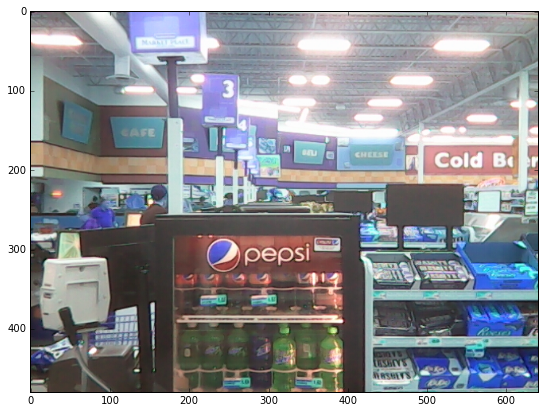

In [11]:
import os
import imutils
import cv2
import numpy as np
from matplotlib import pyplot as plt

%pylab inline
img = cv2.imread('Common/rack1.jpeg')

a = figure(figsize = (20,20))
a = plt.subplot(121),plt.imshow(img)
plt.subplot(121),plt.imshow(img)



(480L, 640L, 3L)


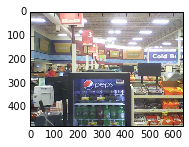

In [12]:
img = img[:,:,::-1]
a = plt.subplot(121),plt.imshow(img)
plt.subplot(121),plt.imshow(img)
print img.shape

(480L, 640L, 3L)


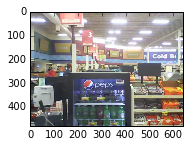

In [13]:
#does image denoising, doesn't seem to help much
img = cv2.fastNlMeansDenoising(img,None,10,21,7)

a = plt.subplot(121),plt.imshow(img)
plt.subplot(121),plt.imshow(img)

print img.shape

Common/reeces\reeces1.jpeg


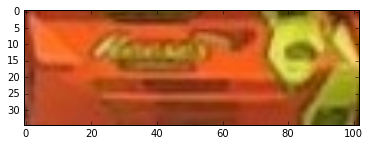

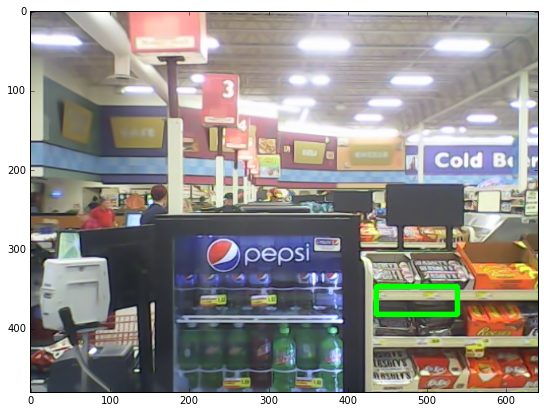

In [15]:
found = None
directory = ("Common/reeces")

#loop through files in directory, get filepath, and set template to be an img on each iteration
for filename in os.listdir("Common/reeces"):
    if filename.endswith(".jpg") or filename.endswith(".jpeg"):
        filepath = os.path.join(directory, filename)
        
        #now do template matching with each pic
        template = cv2.imread(filepath)
        
        template = template[:,:,::-1]
        
        h, w = template.shape[:-1]
        for scale in np.linspace(0.2, 1.0, 20)[::-1]:
            # resize the image according to the scale, and keep track
            # of the ratio of the resizing
            resized = imutils.resize(img, width = int(img.shape[1] * scale))
            #ratio of old image to new
            r = img.shape[1] / float(resized.shape[1])
            # if the resized image is smaller than the template, then break
            #from the loop
            if resized.shape[0] < h or resized.shape[1] < w:
                break
        
            # detect edges in the resized, grayscale image and apply template
            # matching to find the template in the image
            #edged = cv2.Canny(resized, 50, 200)
            result = cv2.matchTemplate(img, template, cv2.TM_CCOEFF)
            (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result)
 
            # draw a bounding box around the detected region
           # clone = np.dstack([edged, edged, edged])
            cv2.rectangle(result, (maxLoc[0], maxLoc[1]),
            (maxLoc[0] + w, maxLoc[1] + h), (0, 0, 255), 2)
    
            if found is None or maxVal > found[0]:
                found = (maxVal, maxLoc, r) 
                used_pic = filepath

# unpack the bookkeeping varaible and compute the (x, y) coordinates
# of the bounding box based on the resized ratio
(_, maxLoc, r) = found
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r))
(endX, endY) = (int((maxLoc[0] + w) * r), int((maxLoc[1] + h) * r))
 
# draw a bounding box around the detected result and display the image
cv2.rectangle(img, (startX, startY), (endX, endY), (0, 255, 0), 5)

plt.imshow(template)

a = figure(figsize = (20,20))
a = plt.subplot(121),plt.imshow(img)
plt.subplot(121),plt.imshow(img)

print used_pic